# **Методи за растеризиране на окръжност**

#### **Домашна работа №2**
#### **Вариант №2**

## **Метода на средната точка за окръжност**

- Алгоритъм се за изчертаване на окръжност в растерна графика, като решава кои пиксели да се включат в окръжността, без да се използват числа с плаваща запетия. Основната идея е:
    - Окръжност с център $(x_c, y_c)$ и радиус $r$ се описва с уравнението: $x^2 + y^2 = r^2$
    - Алгоритъмът започва от точката $(0,r)$ и решава стъпка по стъпка дали да премести точката надясно $E$ или диагонално $SE$, използвайки функцията на средната точка: $d=x^2+y^2−r^2$
    - Ако $d<0$ -> остава на същия ред $E$;
    - Ако $d≥0$ -> премества се диагонално $SE$
- Алгоритъмът използва симетрията на окръжността (8-осна симетрия), за да чертае всички осем октанта едновременно.

## **Модификация с разлики от втори ред**

- Вариант на Метода на средната точка за окръжност за чертане на окръжности с пиксели, но използва разлики от втори ред, за да се изчисляват новите точки по-ефективно, без да се правят тежки аритметични операции с квадратни корени или степени.
- Основната идея е:
    - Чертаем симетрични точки на окръжността, започвайки от върха $(0,r)$ и „спускайки“ по окръжността, използвайки само цели числа.

Център (X):  5
Център (Y):  5
Радиус:  100
Метод [1 = Класически, 2 = С разлики от втори ред]:  2


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


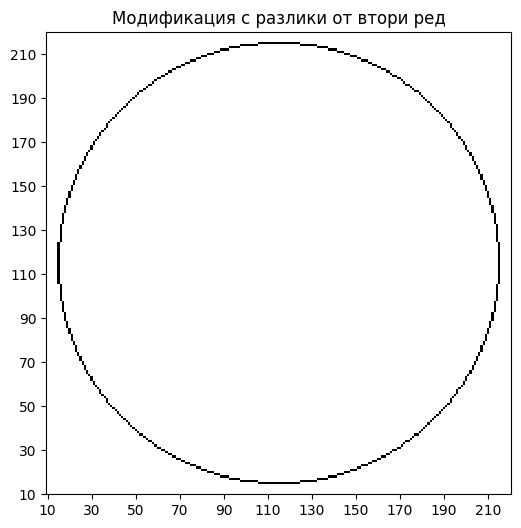

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def draw_pixel(buffer, x, y, value=1):
    h, w = buffer.shape
    if 0 <= x < w and 0 <= y < h:
        buffer[y, x] = value

def plot_circle_points(buffer, xc, yc, x, y, value=1): # ако имаме точка (x, y), 
    pts = [                                            # можем да получим всички точки на окръжността чрез отражения около центъра
        (xc + x, yc + y), (xc - x, yc + y),
        (xc + x, yc - y), (xc - x, yc - y),
        (xc + y, yc + x), (xc - y, yc + x),
        (xc + y, yc - x), (xc - y, yc - x)
    ]
    for px, py in pts:
        draw_pixel(buffer, px, py, value)

def midpoint_circle(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 3 - 2*r # решаваща променлива, която определя дали следващият пиксел ще се движи само по x - E, или по диагонала - SE
    plot_circle_points(buffer, xc, yc, x, y, value)
    while x < y:
        x += 1 # върви по хоризонталната координата на окръжността
        if d < 0: # остава на същата вертикална линия - E, увеличава x, y не се променя
            d += 4*x + 6
        else: # движи се диагонално - SE, увеличава x и намалява y
            y -= 1
            d += 10 + 4*x - 4*y 
        plot_circle_points(buffer, xc, yc, x, y, value)

def midpoint_circle_2nd_diff(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 1 - r 
    dE = 3    # разлика при движение по x       
    dSE = 5 - 2 * r # разлика при движение по диагонала

    plot_circle_points(buffer, xc, yc, x, y, value)

    while x <= y:
        if d < 0: # остава на същата вертикална линия - E, увеличава x, y не се променя
            d += dE
            dE += 2
            dSE += 2
        else:  # движи се диагонално - SE, увеличава x и намалява y
            d += dSE # позволява да не се изчислява квадратично уравнение при всяка итерация.
            dE += 2
            dSE += 4
            y -= 1
        x += 1 # върви по хоризонталната координата на окръжността
        plot_circle_points(buffer, xc, yc, x, y, value)

xc = int(input("Център (X): "))
yc = int(input("Център (Y): "))
r = int(input("Радиус: "))
method = int(input("Метод [1 = Класически, 2 = С разлики от втори ред]: "))

margin = 5
width = max(2 * (abs(xc) + r + margin), 100)
height = max(2 * (abs(yc) + r + margin), 100)

raster = np.zeros((height, width))

xc_display = width // 2 + xc
yc_display = height // 2 + yc

if method == 1:
    midpoint_circle(raster, xc_display, yc_display, r)
    title = "Метод на средната точка (Михенер)"
elif method == 2:
    midpoint_circle_2nd_diff(raster, xc_display, yc_display, r)
    title = "Модификация с разлики от втори ред"
else:
    raise ValueError("Невалиден избор на метод. Избери 1 или 2.")

plt.figure(figsize=(6,6))
plt.imshow(raster, cmap='gray_r', origin='lower', interpolation='nearest')
plt.title(title)
plt.axis("equal")
plt.grid(False)

plt.xlim(xc_display - r - margin, xc_display + r + margin)
plt.ylim(yc_display - r - margin, yc_display + r + margin)

plt.xticks(np.arange(xc_display - r - margin, xc_display + r + margin, max(1, r // 5)))
plt.yticks(np.arange(yc_display - r - margin, yc_display + r + margin, max(1, r // 5)))
plt.show()

Брой окръжности (n):  2



--- Окръжност 1 ---


Център (X):  1
Център (Y):  1
Радиус:  50
Метод [1 = Класически, 2 = С разлики от втори ред]:  1



--- Окръжност 2 ---


Център (X):  1
Център (Y):  1
Радиус:  75
Метод [1 = Класически, 2 = С разлики от втори ред]:  2


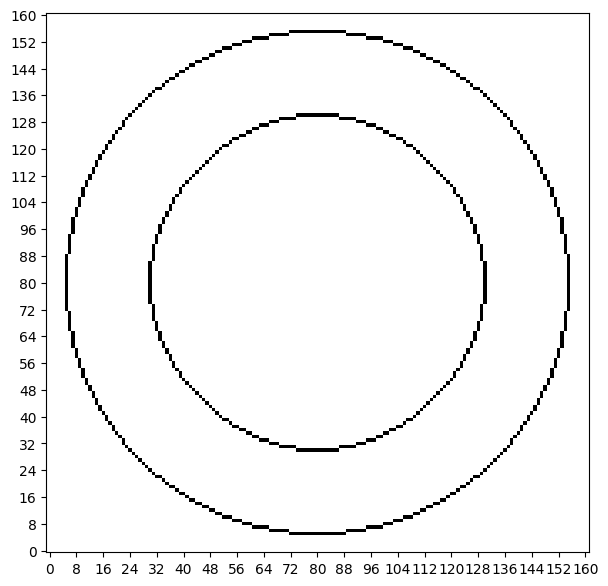

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def draw_pixel(buffer, x, y, value=1):
    h, w = buffer.shape
    if 0 <= x < w and 0 <= y < h:
        buffer[y, x] = value

def plot_circle_points(buffer, xc, yc, x, y, value=1):
    pts = [
        (xc + x, yc + y), (xc - x, yc + y),
        (xc + x, yc - y), (xc - x, yc - y),
        (xc + y, yc + x), (xc - y, yc + x),
        (xc + y, yc - x), (xc - y, yc - x)
    ]
    for px, py in pts:
        draw_pixel(buffer, px, py, value)

def midpoint_circle(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 3 - 2*r
    plot_circle_points(buffer, xc, yc, x, y, value)
    while x < y:
        x += 1
        if d < 0:
            d += 4 * x + 6
        else:
            y -= 1
            d += 10 + 4*x - 4*y 
        plot_circle_points(buffer, xc, yc, x, y, value)

def midpoint_circle_2nd_diff(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 1 - r         
    dE = 3           
    dSE = 5 - 2 * r 

    plot_circle_points(buffer, xc, yc, x, y, value)

    while x <= y:
        if d < 0:
            d += dE
            dE += 2
            dSE += 2
        else:
            d += dSE
            dE += 2
            dSE += 4
            y -= 1
        x += 1
        plot_circle_points(buffer, xc, yc, x, y, value)

n = int(input("Брой окръжности (n): "))

circles = []
for i in range(n):
    print(f"\n--- Окръжност {i+1} ---")
    xc = int(input("Център (X): "))
    yc = int(input("Център (Y): "))
    r = int(input("Радиус: "))
    method = int(input("Метод [1 = Класически, 2 = С разлики от втори ред]: "))
    circles.append((xc, yc, r, method))

margin = 5
xmin = min(xc - r for xc, yc, r, m in circles) - margin
xmax = max(xc + r for xc, yc, r, m in circles) + margin
ymin = min(yc - r for xc, yc, r, m in circles) - margin
ymax = max(yc + r for xc, yc, r, m in circles) + margin

width = int(xmax - xmin + 1)
height = int(ymax - ymin + 1)

raster = np.zeros((height, width))

for i, (xc, yc, r, method) in enumerate(circles, start=1):
    xc_disp = xc - xmin
    yc_disp = yc - ymin
    if method == 1:
        midpoint_circle(raster, int(xc_disp), int(yc_disp), r, value=1)
    else:
        midpoint_circle_2nd_diff(raster, int(xc_disp), int(yc_disp), r, value=1)

plt.figure(figsize=(7,7))
plt.imshow(raster, cmap='gray_r', origin='lower', interpolation='nearest')
plt.axis("equal")
plt.grid(False)

tick_step = max(1, (width + height)//40)
plt.xticks(np.arange(0, width, tick_step))
plt.yticks(np.arange(0, height, tick_step))
plt.show()

## **Растерно устройство с "по-големи пиксели"**

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def draw_pixel(buffer, x, y, value=1):
    h, w = buffer.shape
    if 0 <= x < w and 0 <= y < h:
        buffer[y, x] = value

def plot_circle_points(buffer, xc, yc, x, y, value=1):
    pts = [
        (xc + x, yc + y), (xc - x, yc + y),
        (xc + x, yc - y), (xc - x, yc - y),
        (xc + y, yc + x), (xc - y, yc + x),
        (xc + y, yc - x), (xc - y, yc - x)
    ]
    for px, py in pts:
        draw_pixel(buffer, px, py, value)

def midpoint_circle(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 3 - 2*r
    plot_circle_points(buffer, xc, yc, x, y, value)
    while x < y:
        x += 1
        if d < 0:
            d += 4 * x + 6
        else:
            y -= 1
            d += 10 + 4*x - 4*y 
        plot_circle_points(buffer, xc, yc, x, y, value)

def midpoint_circle_2nd_diff(buffer, xc, yc, r, value=1):
    x = 0
    y = r
    d = 1 - r         
    dE = 3           
    dSE = 5 - 2 * r 
    plot_circle_points(buffer, xc, yc, x, y, value)
    while x <= y:
        if d < 0:
            d += dE
            dE += 2
            dSE += 2
        else:
            d += dSE
            dE += 2
            dSE += 4
            y -= 1
        x += 1
        plot_circle_points(buffer, xc, yc, x, y, value)

n = int(input("Брой окръжности (n): "))

circles = []
for i in range(n):
    print(f"\n--- Окръжност {i+1} ---")
    xc = int(input("Център (X): "))
    yc = int(input("Център (Y): "))
    r = int(input("Радиус: "))
    method = int(input("Метод [1 = Класически, 2 = С разлики от втори ред]: "))
    circles.append((xc, yc, r, method))

margin = 5
xmin = min(xc - r for xc, yc, r, m in circles) - margin
xmax = max(xc + r for xc, yc, r, m in circles) + margin
ymin = min(yc - r for xc, yc, r, m in circles) - margin
ymax = max(yc + r for xc, yc, r, m in circles) + margin

width = int(xmax - xmin + 1)
height = int(ymax - ymin + 1)

raster = np.zeros((height, width))
for xc, yc, r, method in circles:
    xc_disp = xc - xmin
    yc_disp = yc - ymin
    if method == 1:
        midpoint_circle(raster, int(xc_disp), int(yc_disp), r, value=1)
    else:
        midpoint_circle_2nd_diff(raster, int(xc_disp), int(yc_disp), r, value=1)

def show_zoom(scale=1.0):
    plt.figure(figsize=(7,7))
    plt.imshow(raster, cmap='gray_r', origin='lower', interpolation='nearest')
    plt.axis("equal")
    
    center_x = width / 2
    center_y = height / 2
    x_range = width / (2*scale)
    y_range = height / (2*scale)
    plt.xlim(center_x - x_range, center_x + x_range)
    plt.ylim(center_y - y_range, center_y + y_range)
    
    plt.grid(False)
    plt.show()

interact(show_zoom, scale=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Size'))

Брой окръжности (n):  2



--- Окръжност 1 ---


Център (X):  1
Център (Y):  1
Радиус:  100
Метод [1 = Класически, 2 = С разлики от втори ред]:  1



--- Окръжност 2 ---


Център (X):  1
Център (Y):  1
Радиус:  150
Метод [1 = Класически, 2 = С разлики от втори ред]:  2


interactive(children=(FloatSlider(value=1.0, description='Size', max=5.0, min=0.1), Output()), _dom_classes=('…

<function __main__.show_zoom(scale=1.0)>